# Regression Model Rough Draft of Velocity's Relationship with xERA

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from pybaseball import pitching_stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import ModelSpec as MS, summarize, poly

In [2]:
# Allowing myself to see all the columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Selecting Seasons and Displaying Columns in DataFrame

In [3]:
# Setting dataset to data
data = pitching_stats(2024,2024)
data.head()

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA,botERA,botOvr CH,botStf CH,botCmd CH,botOvr CU,botStf CU,botCmd CU,botOvr FA,botStf FA,botCmd FA,botOvr SI,botStf SI,botCmd SI,botOvr SL,botStf SL,botCmd SL,botOvr KC,botStf KC,botCmd KC,botOvr FC,botStf FC,botCmd FC,botOvr FS,botStf FS,botCmd FS,botOvr,botStf,botCmd,botxRV100,Stf+ CH,Loc+ CH,Pit+ CH,Stf+ CU,Loc+ CU,Pit+ CU,Stf+ FA,Loc+ FA,Pit+ FA,Stf+ SI,Loc+ SI,Pit+ SI,Stf+ SL,Loc+ SL,Pit+ SL,Stf+ KC,Loc+ KC,Pit+ KC,Stf+ FC,Loc+ FC,Pit+ FC,Stf+ FS,Loc+ FS,Pit+ FS,Stuff+,Location+,Pitching+,Stf+ FO,Loc+ FO,Pit+ FO
0,10603,2024,Chris Sale,ATL,35,18,3,6.4,2.38,29,29,0,0,0,0,177.2,702,141,48,47,9,39,0,8,4,1,225,191,143,92,8,925,1893,2818,126,5,4,0,11.40,1.98,5.77,7.14,0.46,0.215,1.01,0.314,0.798,2.09,1.34,0.216,0.448,0.336,0.056,0.063,0.026,0.000,56.3,177.2,NaN,NaN,56.3,$51.4,2.45,2.64,4.04,-9.08,13.12,41.11,4.24,0.95,0.90,0.87,0.83,29,4.37,-0.11,0.455,94.8,0.403,78.7,NaN,NaN,NaN,NaN,0.142,86.9,NaN,NaN,NaN,NaN,0.001,NaN,-5.5,24.4,NaN,NaN,12.1,NaN,NaN,-0.43,2.15,NaN,NaN,3.02,NaN,NaN,0.369,0.646,0.490,0.576,0.812,0.711,0.435,0.694,0.141,0,0,0,57,53,66,0.321,0.056,2.80,6.38,0.30,0.378,NaN,NaN,NaN,NaN,0.072,0.403,NaN,NaN,NaN,0.147,NaN,NaN,NaN,94.8,NaN,NaN,NaN,NaN,94.2,78.6,NaN,NaN,NaN,87.1,NaN,NaN,9.5,NaN,NaN,NaN,NaN,11.1,-5.3,NaN,NaN,NaN,10.1,NaN,NaN,5.8,NaN,NaN,NaN,NaN,1.6,-2.9,NaN,NaN,NaN,0.2,NaN,NaN,-1.3,NaN,NaN,NaN,NaN,-4.0,24.6,NaN,NaN,NaN,12.3,NaN,NaN,-0.12,NaN,NaN,NaN,NaN,-1.99,2.16,NaN,NaN,NaN,2.97,NaN,NaN,0.345,0.623,0.490,0.536,0.802,0.712,0.520,19.6,7.

In [4]:
data.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'Pit+ FC', 'Stf+ FS', 'Loc+ FS', 'Pit+ FS', 'Stuff+', 'Location+',
       'Pitching+', 'Stf+ FO', 'Loc+ FO', 'Pit+ FO'],
      dtype='object', length=393)

# Creating a DataFrame containing: Pitch Velocity, Name, ERA, Exit Velocity, and Location

In [5]:
pitchers_data = data[['Name','xERA', 'EV', 'Contact%', 'AVG', 'K%', 'FBv', 'CTv', 'CBv', 'CHv', 'SFv', 'KNv', 'Location+']]
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,SFv,KNv,Location+
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,NaN,NaN,86.9,NaN,NaN,111
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,NaN,78.5,86.3,NaN,NaN,100
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,NaN,86.2,NaN,104
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,NaN,NaN,99
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,85.8,NaN,100


# Checking for Missing Values

In [6]:
missing_data = pitchers_data.isna()
for column in pitchers_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Name
Name
False    58
Name: count, dtype: int64

xERA
xERA
False    58
Name: count, dtype: int64

EV
EV
False    58
Name: count, dtype: int64

Contact%
Contact%
False    58
Name: count, dtype: int64

AVG
AVG
False    58
Name: count, dtype: int64

K%
K%
False    58
Name: count, dtype: int64

FBv
FBv
False    58
Name: count, dtype: int64

CTv
CTv
False    37
True     21
Name: count, dtype: int64

CBv
CBv
False    43
True     15
Name: count, dtype: int64

CHv
CHv
False    47
True     11
Name: count, dtype: int64

SFv
SFv
True     43
False    15
Name: count, dtype: int64

KNv
KNv
True     57
False     1
Name: count, dtype: int64

Location+
Location+
False    58
Name: count, dtype: int64



# Dealing with NaN
* Only one pitcher throws a knuckleball, so knuckeballs will not be included in the model
* Dropping SFv because only 11 pitchers throw an SF, so I cannot justify it being in the model
* Reaplcing all the other columns missing data with the columns mean

In [7]:
pitchers_data = pitchers_data.drop(['KNv', 'SFv'], axis=1)
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,NaN,NaN,86.9,111
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,NaN,78.5,86.3,100
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,NaN,104
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100


In [8]:
# Calculating the correlation of the values, primarily focusing on the velocity correlation
# to see if it would be beneficial to use another pitch to calculate the missing values
no_name_df = pitchers_data
no_name_df = no_name_df.drop('Name', axis=1)
print(no_name_df.corr())

               xERA        EV  Contact%       AVG        K%       FBv  \
xERA       1.000000  0.457882  0.575992  0.702274 -0.754546 -0.493570   
EV         0.457882  1.000000  0.210853  0.246754 -0.293816 -0.115060   
Contact%   0.575992  0.210853  1.000000  0.638360 -0.837054 -0.405059   
AVG        0.702274  0.246754  0.638360  1.000000 -0.662678 -0.308276   
K%        -0.754546 -0.293816 -0.837054 -0.662678  1.000000  0.508971   
FBv       -0.493570 -0.115060 -0.405059 -0.308276  0.508971  1.000000   
CTv       -0.293029 -0.032308 -0.098336 -0.252239  0.262758  0.757134   
CBv       -0.220240  0.342211 -0.163748 -0.200311  0.274110  0.620101   
CHv       -0.094937  0.015816  0.104652  0.092495  0.026645  0.106104   
Location+ -0.247544  0.088215 -0.046688 -0.096791  0.105284  0.076436   

                CTv       CBv       CHv  Location+  
xERA      -0.293029 -0.220240 -0.094937  -0.247544  
EV        -0.032308  0.342211  0.015816   0.088215  
Contact%  -0.098336 -0.163748  0.1046

In [9]:
# Inputing Missing Data for cutters
throws_ctv = pitchers_data[['FBv','CTv']].dropna()
print(throws_ctv['FBv'].mean())
print(throws_ctv['CTv'].mean())
ctv_fb_ratio = throws_ctv['CTv'].mean() / throws_ctv['FBv'].mean()
print(ctv_fb_ratio)
pitchers_data['CTv'] = pitchers_data['CTv'].fillna(pitchers_data['FBv']*ctv_fb_ratio)
pitchers_data['CTv'] = pitchers_data['CTv'].round(1)
pitchers_data.head()

93.62972972972972
89.26756756756755
0.9534105013999942


,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,90.4,NaN,86.9,111
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,92.3,78.5,86.3,100
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,NaN,104
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100


In [69]:
cbv_mean = pitchers_data['CBv'].mean()
chv_mean = pitchers_data['CHv'].mean()
pitchers_data['CBv'] = pitchers_data['CBv'].fillna(cbv_mean)
pitchers_data['CHv'] = pitchers_data['CHv'].fillna(chv_mean)
pitchers_data['CBv'] = pitchers_data['CBv'].round(1)
pitchers_data['CHv'] = pitchers_data['CHv'].round(1)
pitchers_data.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+,FB_Grouped
0,Chris Sale,2.79,86.5,0.711,0.215,0.321,94.8,90.4,79.3,86.9,111,Third_Quartile
1,Tarik Skubal,2.72,87.4,0.717,0.200,0.303,96.8,92.3,78.5,86.3,100,Fourth_Quartile
2,Zack Wheeler,2.85,86.7,0.747,0.191,0.285,95.1,91.1,81.8,85.6,104,Third_Quartile
11,Cole Ragans,3.31,88.3,0.705,0.212,0.293,95.4,91.0,80.8,84.8,99,Fourth_Quartile
9,Seth Lugo,3.74,88.5,0.795,0.227,0.217,92.2,89.9,79.8,87.5,100,First_Quartile


In [70]:
# Saving DataFrame as csv
pitchers_data.to_csv('Pitchers_Data.csv', index=False)

# Examing the Data through graphs and statistics

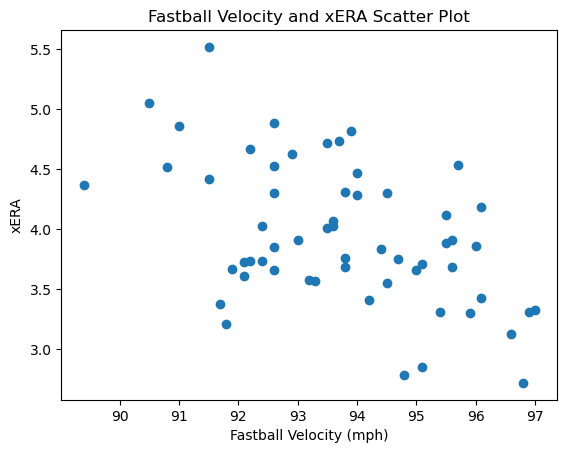

In [11]:
# Examing fastball velocity and xERA through a scatter plot;
plt.scatter(pitchers_data['FBv'], pitchers_data['xERA'])
plt.title("Fastball Velocity and xERA Scatter Plot")
plt.xlabel('Fastball Velocity (mph)')
plt.ylabel('xERA')
plt.show()

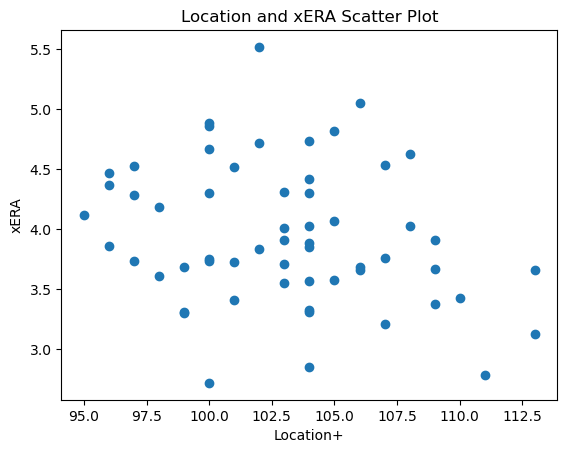

In [12]:
# Examing Location+ and xERA through a scatter plot
plt.scatter(pitchers_data['Location+'], pitchers_data['xERA'])
plt.title('Location and xERA Scatter Plot')
plt.xlabel('Location+')
plt.ylabel('xERA')
plt.show()

In [13]:
# Examing xERA via fastball velocity
pitchers_data['FBv'].describe()
bins = [0, 92.45, 93.75, 95.1, 98]
labels = ['First_Quartile', 'Second_Quartile', 'Third_Quartile', 'Fourth_Quartile']
pitchers_data['FB_Grouped'] = pd.cut(
    pitchers_data['FBv'],
    bins=bins,
    labels=labels,
    include_lowest = True
    )
bar_graph_fb_grouped_df = pitchers_data.copy()
bar_graph_fb_grouped_df = bar_graph_fb_grouped_df.sort_values(by='FBv', ascending=True)
bar_graph_fb_grouped_df.reset_index(drop=True)
bar_graph_fb_grouped_df.head()

,Name,xERA,EV,Contact%,AVG,K%,FBv,CTv,CBv,CHv,Location+,FB_Grouped
34,Tyler Anderson,4.37,87.2,0.741,0.231,0.186,89.4,84.2,71.7,79.0,96,First_Quartile
54,Austin Gomber,5.05,90.2,0.821,0.271,0.167,90.5,86.3,77.6,81.1,106,First_Quartile
31,Jose Quintana,4.52,88.0,0.801,0.233,0.188,90.8,86.6,77.6,85.8,101,First_Quartile
45,Kyle Gibson,4.86,88.2,0.756,0.248,0.209,91.0,88.7,78.3,84.9,100,First_Quartile
57,Patrick Corbin,5.52,90.8,0.788,0.294,0.182,91.5,85.5,79.3,81.1,102,First_Quartile


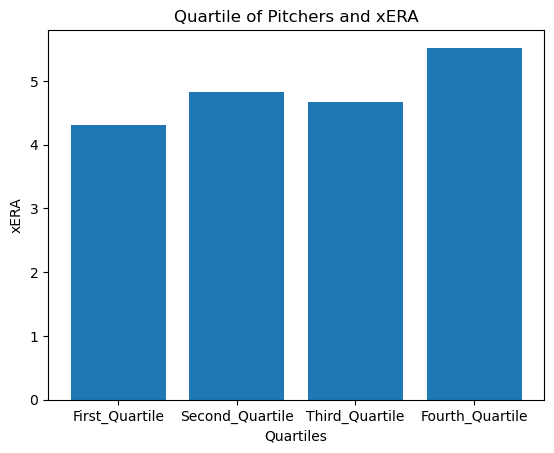

In [14]:
plt.bar(bar_graph_fb_grouped_df['FB_Grouped'], pitchers_data['xERA'], )
plt.title("Quartile of Pitchers and xERA")
plt.xlabel("Quartiles")
plt.ylabel("xERA")
plt.show()

In [15]:
# Grouping by FB_Group and examing statistics
fb_by_groups = pitchers_data.groupby('FB_Grouped')['xERA']
fb_by_groups.describe()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_65740/1565048600.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb_by_groups = pitchers_data.groupby('FB_Grouped')['xERA']


,count,mean,std,min,25%,50%,75%,max
FB_Grouped,,,,,,,,
First_Quartile,15.0,4.168000,0.667631,3.21,3.700,4.03,4.595,5.52
Second_Quartile,14.0,4.177857,0.455432,3.57,3.865,4.05,4.605,4.89
Third_Quartile,15.0,3.813333,0.561855,2.79,3.605,3.75,4.295,4.82
Fourth_Quartile,14.0,3.623571,0.488760,2.72,3.310,3.56,3.905,4.54


 # Regression Modeling

# Model 1 consisting of all pitches velocity
* Working backwards

In [16]:
# Working backwards
all_pitches = pitchers_data[['FBv', 'CTv', 'CBv', 'CHv', 'xERA']]
all_pitches_v = all_pitches.columns.drop('xERA')
x1 = MS(all_pitches_v).fit_transform(all_pitches)
y1 = all_pitches['xERA']
model1 = sm.OLS(y1, x1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     4.756
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00236
Time:                        20:13:39   Log-Likelihood:                -42.050
No. Observations:                  58   AIC:                             94.10
Df Residuals:                      53   BIC:                             104.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.3139      4.066      4.996      0.000      12.159      28.469
FBv           -0.2243      0.071     -3.143      0.003      -0.367      -0.081
CTv            0.0349      0.053      0.662      0.511      -0.071       0.141
CBv            0.0297      0.031      0.966      0.338      -0.032       0.091
CHv           -0.0096      0.023     -0.408      0.685      -0.057       0.038
==============================================================================
Omnibus:                        1.030   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.972
Skew:                           0.129   Prob(JB):                        0.615
Kurtosis:                       2.421   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.02, 'Model 1 Scatterplot')

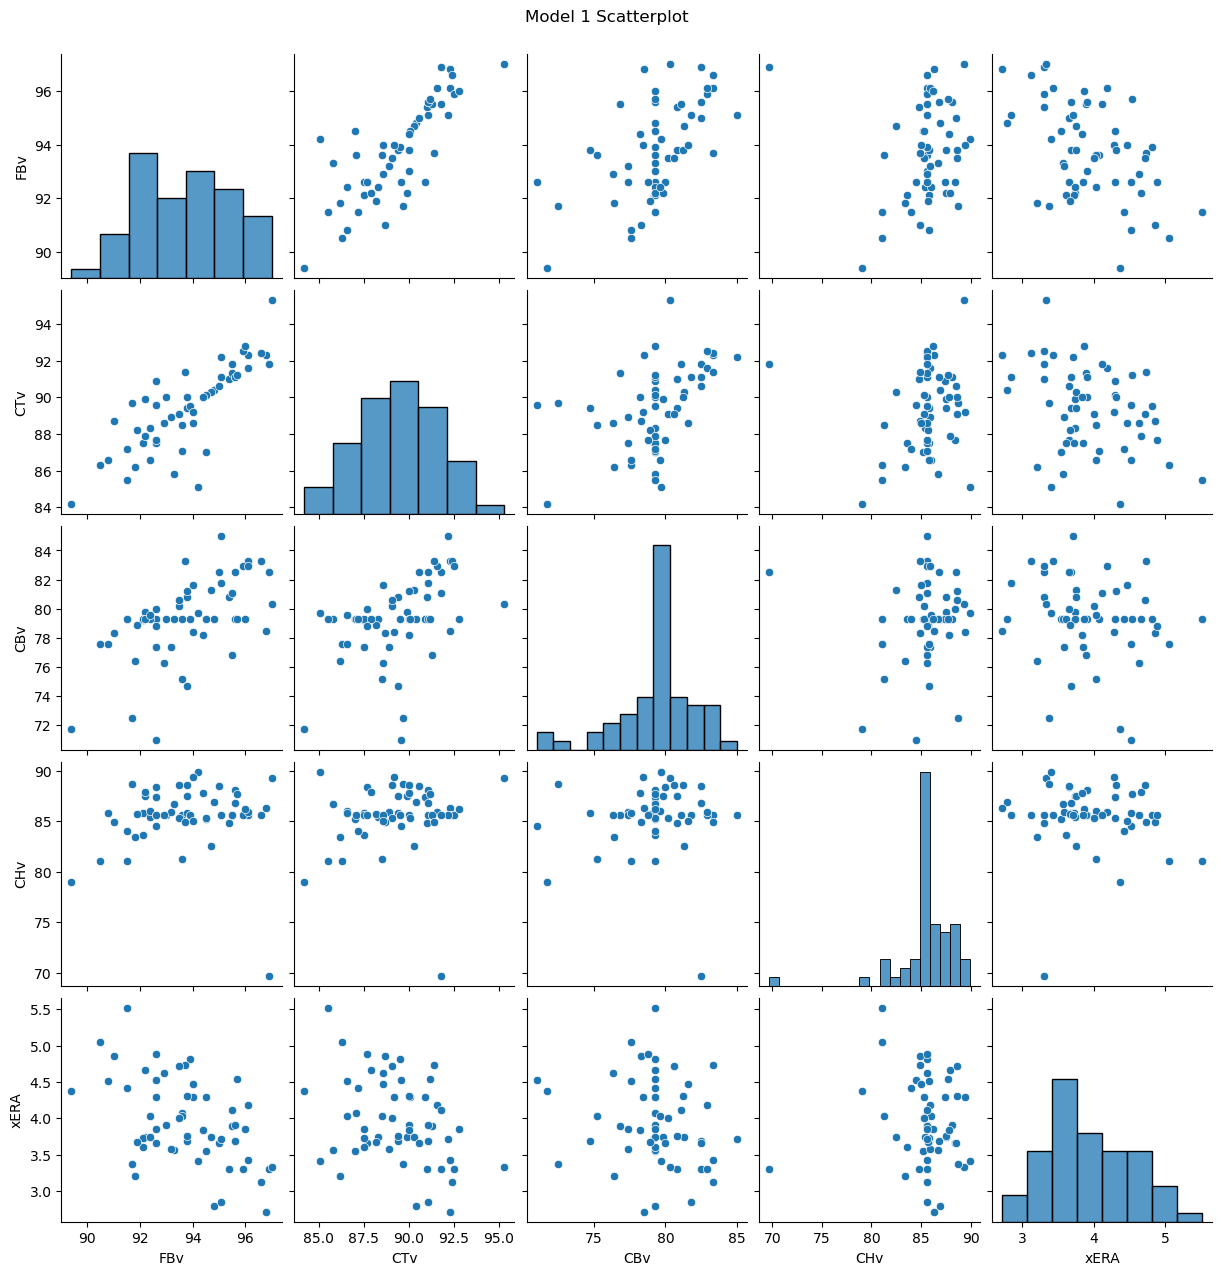

In [17]:
# Displaying a scatterplot matrix of model1
all_pitches = all_pitches.copy()
scat1 = sns.pairplot(all_pitches)
scat1.fig.suptitle("Model 1 Scatterplot", y=1.02)

In [18]:
# Testing for VIF (since there is a great chance of multicollinearity)
vals1 = [VIF(x1, i) for i in range(1, x1.shape[1])]
vif1 = pd.DataFrame({'vif': vals1}, index=x1.columns[1:])
vif1

,vif
FBv,3.298983
CTv,2.899722
CBv,1.455380
CHv,1.024723


In [19]:
# Outliers
all_pitches_only_df = all_pitches.copy()
all_pitches_only_df = all_pitches_only_df.drop('xERA', axis=1)
z_scores1 = np.abs(stats.zscore(all_pitches_only_df))
z_scores_df1 = pd.DataFrame(z_scores1, columns=all_pitches_only_df.columns)
outliers1 = np.where((z_scores1 > 3).any(axis=1))[0]
print("Outliers:", outliers1)
print("Number of outliers:", len(outliers1))
print(all_pitches.loc[outliers1])

Outliers: [ 5 39]
Number of outliers: 2
     FBv   CTv   CBv   CHv  xERA
5   94.2  85.1  79.7  89.9  3.41
39  95.5  91.8  81.1  85.6  4.12


In [20]:
# Finding high inluence values
influence1 = results1.get_influence()
(c1, p1) = influence1.cooks_distance
high_influence1_df = pd.DataFrame()
high_influence1_df['cooks_d'] = c1
high_influence1_df['leverage'] = influence1.hat_matrix_diag
n1 = len(high_influence1_df)
threshold1 = 4 / n1
high_influence1_df['high_influence'] = high_influence1_df['cooks_d'] > threshold1
high_influence_indices1 = np.where(high_influence1_df['high_influence'])[0]
print(all_pitches.loc[high_influence_indices1])
print()
print(high_influence1_df.head())

     FBv   CTv   CBv   CHv  xERA
5   94.2  85.1  79.7  89.9  3.41
24  96.1  92.3  83.3  85.6  3.43
39  95.5  91.8  81.1  85.6  4.12
47  92.6  87.7  78.8  85.6  4.89

    cooks_d  leverage  high_influence
0  0.020376  0.029498           False
1  0.038992  0.111966           False
2  0.023539  0.034881           False
3  0.003836  0.034929           False
4  0.025951  0.090976           False


In [21]:
all_pitches_11 = all_pitches
all_pitches_11 = all_pitches_11.drop(high_influence_indices1)
print(all_pitches_11.shape)
all_pitches_11.head()

(54, 5)


,FBv,CTv,CBv,CHv,xERA
0,94.8,90.4,79.3,86.9,2.79
1,96.8,92.3,78.5,86.3,2.72
2,95.1,91.1,81.8,85.6,2.85
11,95.4,91.0,80.8,84.8,3.31
9,92.2,89.9,79.8,87.5,3.74


In [22]:
# First Model removed high influence
all_pitches_v11 = all_pitches_11.columns.drop('xERA')
print(all_pitches_11.shape)
x11 = MS(all_pitches_v11).fit_transform(all_pitches_11)
y11 = all_pitches_11['xERA']
model11 = sm.OLS(y11, x11)
results11 = model11.fit()
results11.summary()

(54, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.170
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00551
Time:                        20:13:40   Log-Likelihood:                -39.345
No. Observations:                  54   AIC:                             88.69
Df Residuals:                      49   BIC:                             98.63
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.5999      4.254      4.607      0.000      11.051      28.149
FBv           -0.2058      0.079     -2.601      0.012      -0.365      -0.047
CTv            0.0206      0.062      0.330      0.742      -0.105       0.146
CBv            0.0294      0.031      0.941      0.351      -0.033       0.092
CHv           -0.0063      0.025     -0.255      0.800      -0.056       0.043
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.881
Skew:                           0.142   Prob(JB):                        0.644
Kurtosis:                       2.442   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2 All velocities exclduing CHv
* Removing CHv due to its high p-value

In [23]:
# Removing CHv (very high p-value)
pitches_minus_chv_df = pitchers_data[['FBv', 'CTv', 'CBv', 'xERA']]
excluding_ch = pitches_minus_chv_df.columns.drop('xERA')
x2 = MS(excluding_ch).fit_transform(pitches_minus_chv_df)
y2 = pitches_minus_chv_df['xERA']
model2 = sm.OLS(y2, x2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     6.384
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           0.000879
Time:                        20:13:40   Log-Likelihood:                -42.141
No. Observations:                  58   AIC:                             92.28
Df Residuals:                      54   BIC:                             100.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6252      3.671      5.347      0.000      12.266      26.984
FBv           -0.2230      0.071     -3.153      0.003      -0.365      -0.081
CTv            0.0324      0.052      0.623      0.536      -0.072       0.136
CBv            0.0294      0.031      0.964      0.339      -0.032       0.091
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.872
Skew:                           0.129   Prob(JB):                        0.647
Kurtosis:                       2.457   Cond. No.                     8.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.02, 'Model 2 Scatterplot')

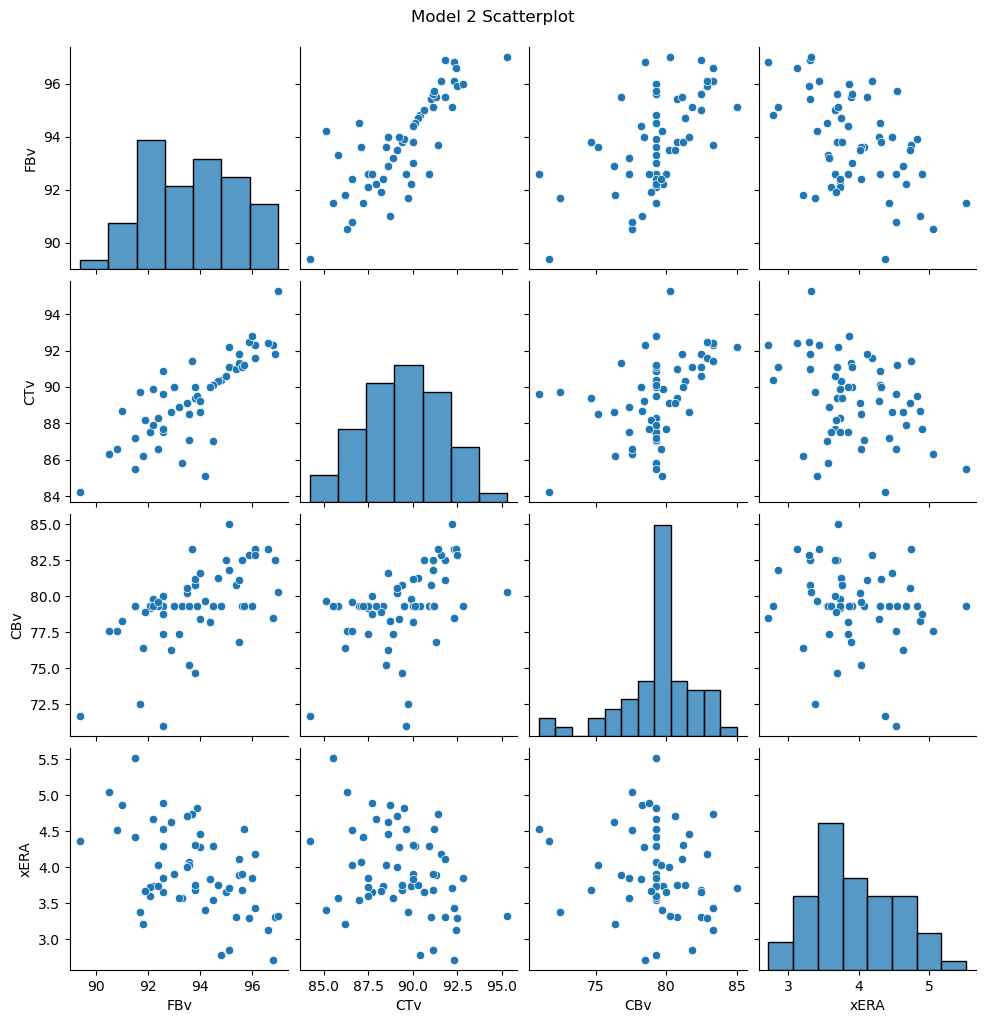

In [24]:
# Creating a scatterplot for model 2
pitches_minus_chv_df = pitches_minus_chv_df.copy()
scat2 = sns.pairplot(pitches_minus_chv_df)
scat2.fig.suptitle('Model 2 Scatterplot', y=1.02)

In [25]:
# Outliers
pitches_minus_chv_df['xERA'] = pitchers_data['xERA']
z_scores2 = np.abs(stats.zscore(pitches_minus_chv_df))
z_scores_df2 = pd.DataFrame(z_scores2, columns=pitches_minus_chv_df.columns)
outliers2 = np.where((z_scores2 > 3).any(axis=1))[0]
print('Outliers:', outliers2)
print('Number of Outliers:', len(outliers2))
print(pitches_minus_chv_df.loc[outliers2])

Outliers: [39]
Number of Outliers: 1
     FBv   CTv   CBv  xERA
39  95.5  91.8  81.1  4.12


In [26]:
# High Influence Values
influence2 = results2.get_influence()
(c2, p2) = influence2.cooks_distance
high_influence2_df = pd.DataFrame()
high_influence2_df['cooks_d'] = c2
high_influence2_df['leverage'] = influence2.hat_matrix_diag
n2 = len(high_influence2_df)
threshold2 = 3 / n2
high_influence2_df['high_influence'] = high_influence2_df['cooks_d'] > threshold2
high_influence_indices2 = np.where(high_influence2_df['high_influence'])[0]
print(pitches_minus_chv_df.loc[high_influence_indices2])
print()
print(high_influence2_df.head())

     FBv   CTv   CBv  xERA
24  96.1  92.3  83.3  3.43
29  94.4  90.0  78.2  3.84
39  95.5  91.8  81.1  4.12
47  92.6  87.7  78.8  4.89

    cooks_d  leverage  high_influence
0  0.023745  0.026585           False
1  0.049936  0.111664           False
2  0.029494  0.034670           False
3  0.004317  0.032806           False
4  0.032459  0.085986           False


In [27]:
pitches_minus_chv_df22 = pitches_minus_chv_df
pitches_minus_chv_df22 = pitches_minus_chv_df22.drop(high_influence_indices2)
print(pitches_minus_chv_df22.shape)
pitches_minus_chv_df22.head()

(54, 4)


,FBv,CTv,CBv,xERA
0,94.8,90.4,79.3,2.79
1,96.8,92.3,78.5,2.72
2,95.1,91.1,81.8,2.85
11,95.4,91.0,80.8,3.31
9,92.2,89.9,79.8,3.74


In [28]:
# Model 2 excluding high influence values
excluding_ch22 = pitches_minus_chv_df22.columns.drop('xERA')
x22 = MS(excluding_ch22).fit_transform(pitches_minus_chv_df22)
y22 = pitches_minus_chv_df22['xERA']
model22 = sm.OLS(y22, x22)
results22 = model22.fit()
results22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5.812
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00173
Time:                        20:13:40   Log-Likelihood:                -39.580
No. Observations:                  54   AIC:                             87.16
Df Residuals:                      50   BIC:                             95.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.3466      3.810      5.078      0.000      11.694      27.000
FBv           -0.2223      0.072     -3.105      0.003      -0.366      -0.079
CTv            0.0345      0.053      0.655      0.515      -0.071       0.140
CBv            0.0294      0.031      0.945      0.349      -0.033       0.092
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.866
Skew:                           0.181   Prob(JB):                        0.648
Kurtosis:                       2.496   Cond. No.                     8.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 3 Fastball and Curveball
* There was still mulicollinearity and CTv had a high p_values

In [29]:
# Fastball and Curveball only due to multicolinearity and p-value
fb_cb_df = pitchers_data[['FBv', 'CBv', 'xERA']]
fb_cb_v = fb_cb_df.columns.drop('xERA')
x3 = MS(fb_cb_v).fit_transform(fb_cb_df)
y3 = fb_cb_df['xERA']
model3 = sm.OLS(y3, x3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     9.487
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           0.000289
Time:                        20:13:40   Log-Likelihood:                -42.348
No. Observations:                  58   AIC:                             90.70
Df Residuals:                      55   BIC:                             96.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.4130      3.634      5.342      0.000      12.130      26.696
FBv           -0.1901      0.047     -4.066      0.000      -0.284      -0.096
CBv            0.0296      0.030      0.976      0.333      -0.031       0.090
==============================================================================
Omnibus:                        1.471   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.162
Skew:                           0.113   Prob(JB):                        0.559
Kurtosis:                       2.345   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
vals3 = [VIF(x3, i) for i in range(1, x3.shape[1])]
vif3 = pd.DataFrame({'vif': vals3}, index=x3.columns[1:])
vif3

,vif
FBv,1.454387
CBv,1.454387


Text(0.5, 1.02, 'Model 3 Scatterplot')

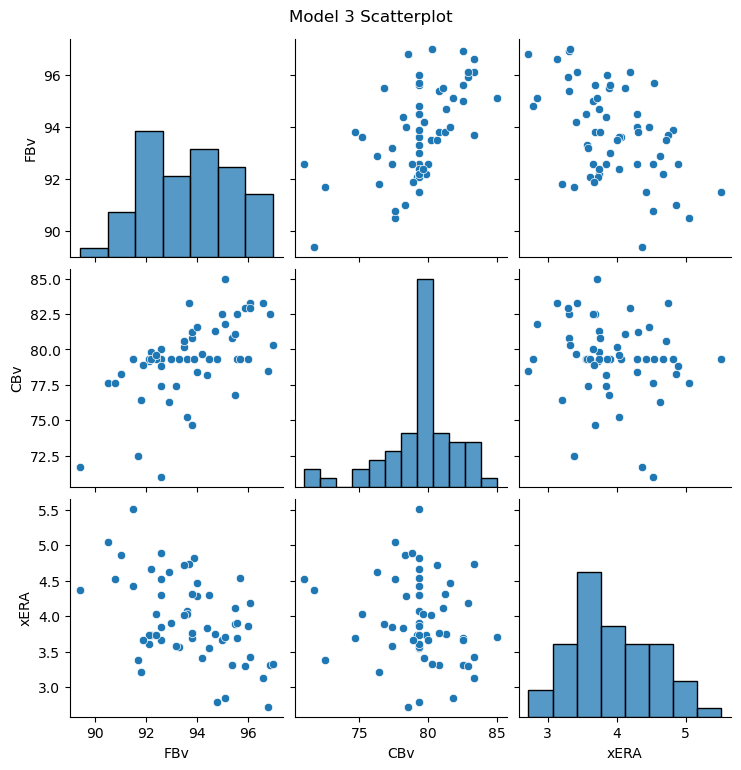

In [31]:
# Printing Scatterplot with abline
fb_cb_df = fb_cb_df.copy()
scat3 = sns.pairplot(fb_cb_df)
scat3.fig.suptitle('Model 3 Scatterplot', y=1.02)

In [32]:
# Outliers
z_scores3 = np.abs(stats.zscore(fb_cb_df))
z_scores_df3 = pd.DataFrame(z_scores3, columns=fb_cb_df.columns)
outliers3 = np.where((z_scores3 > 3).any(axis=1))[0]
print('Outliers:', outliers3)
print('Number of outliers:', len(outliers3))
print(fb_cb_df.loc[outliers3])

Outliers: [39]
Number of outliers: 1
     FBv   CBv  xERA
39  95.5  81.1  4.12


In [33]:
# High Influence Values
influence3 = results3.get_influence()
(c3, p3) = influence3.cooks_distance
high_influence3_df = pd.DataFrame()
high_influence3_df['cooks_d'] = c1
high_influence3_df['leverage'] = influence3.hat_matrix_diag
n3 = len(high_influence3_df)
threshold = 2 / n3
high_influence3_df['high_influence'] = high_influence3_df['cooks_d'] > threshold
high_influence_indices3 = np.where(high_influence3_df['high_influence'])[0]
print(fb_cb_df.loc[high_influence_indices3])
print()
print(high_influence3_df.head())

     FBv   CBv  xERA
1   96.8  78.5  2.72
5   94.2  79.7  3.41
24  96.1  83.3  3.43
29  94.4  78.2  3.84
39  95.5  81.1  4.12
43  92.6  71.0  4.53
47  92.6  78.8  4.89
53  93.8  80.8  3.76

    cooks_d  leverage  high_influence
0  0.020376  0.026562           False
1  0.038992  0.111346            True
2  0.023539  0.033577           False
3  0.003836  0.032759           False
4  0.025951  0.041988           False


In [34]:
fb_cb_df33 = fb_cb_df
fb_cb_df33 = fb_cb_df33.drop(high_influence_indices3)
print(fb_cb_df33.shape)
fb_cb_df33.head()

(50, 3)


,FBv,CBv,xERA
0,94.8,79.3,2.79
2,95.1,81.8,2.85
11,95.4,80.8,3.31
9,92.2,79.8,3.74
20,96.9,82.5,3.31


In [35]:
# Model 3 without high influence
fb_cb_v33 = fb_cb_df33.columns.drop('xERA')
x33 = MS(fb_cb_v33).fit_transform(fb_cb_df33)
y33 = fb_cb_df33['xERA']
model33 = sm.OLS(y33, x33)
results33 = model33.fit()
results33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     6.629
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00291
Time:                        20:13:41   Log-Likelihood:                -36.699
No. Observations:                  50   AIC:                             79.40
Df Residuals:                      47   BIC:                             85.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     17.4643      3.910      4.466      0.000       9.598      25.331
FBv           -0.1801      0.052     -3.478      0.001      -0.284      -0.076
CBv            0.0424      0.036      1.188      0.241      -0.029       0.114
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.860
Skew:                           0.141   Prob(JB):                        0.651
Kurtosis:                       2.423   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 4 Only has FBv as a predictor variable because p-values for the other predictor variables' p-values are too high

In [36]:
# Fastball only Model
fb_v_df = pitchers_data[['FBv', 'xERA']]
fb_v = fb_v_df[['FBv']]
x4 = MS(fb_v).fit_transform(fb_v_df)
y4 = fb_v_df[['xERA']]
model4 = sm.OLS(y4, x4)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     18.04
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           8.25e-05
Time:                        20:13:41   Log-Likelihood:                -42.847
No. Observations:                  58   AIC:                             89.69
Df Residuals:                      56   BIC:                             93.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.3717      3.633      5.333      0.000      12.095      26.649
FBv           -0.1645      0.039     -4.247      0.000      -0.242      -0.087
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.716
Skew:                           0.096   Prob(JB):                        0.699
Kurtosis:                       2.491   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

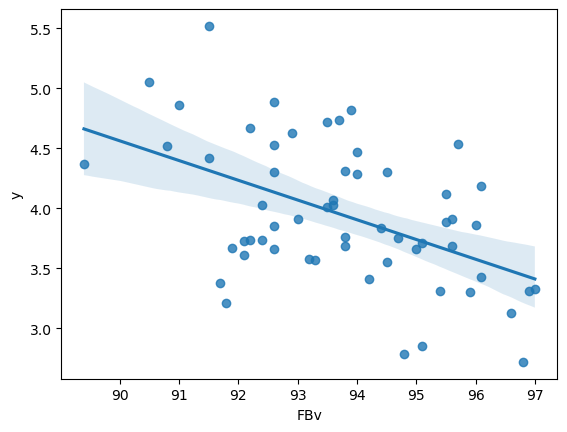

In [37]:
# Regression Model
fb_v = fb_v.copy()
fb_v['y'] = pitchers_data[['xERA']]
scat4 = sns.regplot(data=fb_v, x='FBv', y='y')

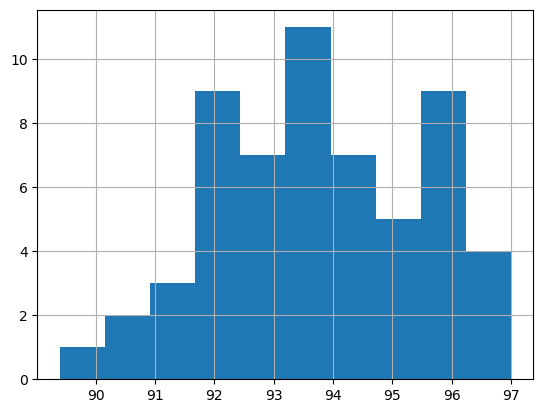

In [38]:
hist4 = fb_v['FBv'].hist()

In [39]:
# outliers
z_scores4 = np.abs(stats.zscore(fb_v_df))
z_score_df4 = pd.DataFrame(z_scores4, columns=fb_v_df.columns)
outliers4 = np.where((z_scores4 > 3).any(axis=1))[0]
print('Outliers:', outliers4)
print('Number of outliers:', len(outliers4))

Outliers: []
Number of outliers: 0


In [40]:
influence4 = results4.get_influence()
(c4, p4) = influence4.cooks_distance
high_influence4_df = pd.DataFrame()
high_influence4_df['cooks_d'] = c1
high_influence4_df['leverage'] = influence4.hat_matrix_diag
n4 = len(high_influence4_df)
threshold4 = 1 / n4
high_influence4_df['high_influence'] = high_influence4_df['cooks_d'] > threshold4
high_influence_indices4 = np.where(high_influence4_df['high_influence'])[0]
print(fb_v_df.loc[high_influence_indices4])
print()
print(high_influence4_df.head())

     FBv  xERA
0   94.8  2.79
1   96.8  2.72
2   95.1  2.85
4   91.7  3.38
5   94.2  3.41
14  93.8  3.69
24  96.1  3.43
29  94.4  3.84
39  95.5  4.12
43  92.6  4.53
47  92.6  4.89
51  94.5  4.30
53  93.8  3.76
57  91.5  5.52

    cooks_d  leverage  high_influence
0  0.020376  0.023551            True
1  0.038992  0.070029            True
2  0.023539  0.027642            True
3  0.003836  0.032750           False
4  0.025951  0.030693            True


In [41]:
fb_v_df44 = fb_v_df
fb_v_df44 = fb_v_df44.drop(high_influence_indices4)
print(fb_v_df44.shape)
fb_v_df44.head()

(44, 2)


,FBv,xERA
11,95.4,3.31
9,92.2,3.74
20,96.9,3.31
17,94.5,3.55
22,92.6,4.30


In [42]:
# Model 4 without high influence values
fb_v44 = fb_v_df44[['FBv']]
x44 = MS(fb_v44).fit_transform(fb_v_df44)
y44 = fb_v_df44[['xERA']]
model44 = sm.OLS(y44, x44)
results44 = model44.fit()
results44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     10.33
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00252
Time:                        20:13:41   Log-Likelihood:                -26.456
No. Observations:                  44   AIC:                             56.91
Df Residuals:                      42   BIC:                             60.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3826      3.545      4.339      0.000       8.228      22.537
FBv           -0.1216      0.038     -3.213      0.003      -0.198      -0.045
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.312
Skew:                           0.202   Prob(JB):                        0.519
Kurtosis:                       2.257   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 5 Inverse Fastball

In [43]:
# Applying an inverse transformation on the FBv predictor variable
inv_fb_v_df = pitchers_data[['FBv', 'xERA']]
inv_fb_v_df['inv_fb_v'] = 1 / inv_fb_v_df['FBv']
inv_fb_v_df = inv_fb_v_df.copy()
inv_fb = inv_fb_v_df[['inv_fb_v']]
x5 = MS(inv_fb).fit_transform(inv_fb_v_df)
y5 = inv_fb_v_df[['xERA']]
model5 = sm.OLS(y5, x5)
results5 = model5.fit()
results5.summary()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_65740/3994865084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_fb_v_df['inv_fb_v'] = 1 / inv_fb_v_df['FBv']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     17.90
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           8.71e-05
Time:                        20:13:41   Log-Likelihood:                -42.900
No. Observations:                  58   AIC:                             89.80
Df Residuals:                      56   BIC:                             93.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.3986      3.628     -3.142      0.003     -18.666      -4.131
inv_fb_v    1438.0623    339.903      4.231      0.000     757.154    2118.970
==============================================================================
Omnibus:                        0.642   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.732
Skew:                           0.098   Prob(JB):                        0.693
Kurtosis:                       2.486   Cond. No.                     5.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

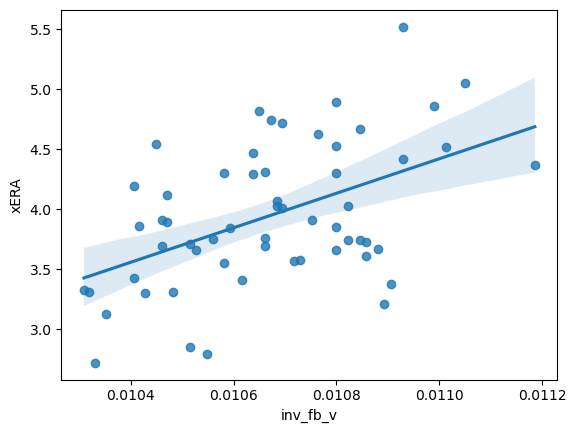

In [44]:
inv_fb_v_df = inv_fb_v_df.drop('FBv', axis= 1)
scat5 = sns.regplot(data=inv_fb_v_df, x='inv_fb_v', y='xERA')

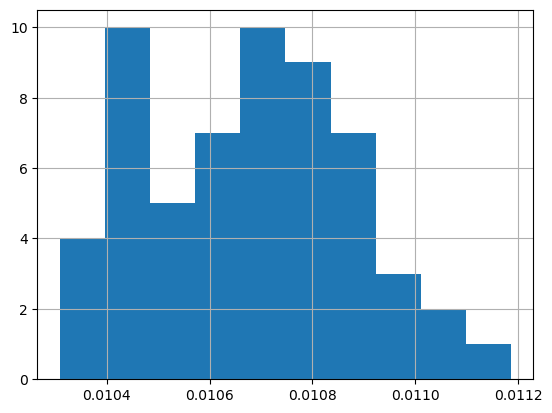

In [45]:
hist5 = inv_fb_v_df['inv_fb_v'].hist()

In [46]:
# outliers
z_scores5 = np.abs(stats.zscore(inv_fb_v_df))
z_score_df5 = pd.DataFrame(z_scores5, columns=inv_fb_v_df.columns)
outliers5 = np.where((z_scores5 > 3).any(axis=1))[0]
print('Outliers:', outliers5)
print('Number of outliers:', len(outliers5))

Outliers: []
Number of outliers: 0


In [47]:
# High influence values
influence5 = results5.get_influence()
(c5, p5) = influence5.cooks_distance
high_influence5_df = pd.DataFrame()
high_influence5_df['cooks_d'] = c5
high_influence5_df['leverage'] = influence5.hat_matrix_diag
n5 = len(high_influence5_df)
threshold5 = 1 / n5
high_influence5_df['high_influence'] = high_influence5_df['cooks_d'] > threshold5
high_influence_indices5 = np.where(high_influence5_df['high_influence'])[0]
print(inv_fb_v_df.loc[high_influence_indices5])
print()
print(high_influence5_df.head())

    xERA  inv_fb_v
0   2.79  0.010549
1   2.72  0.010331
2   2.85  0.010515
23  3.30  0.010428
24  3.43  0.010406
27  4.74  0.010672
28  3.91  0.010460
29  3.84  0.010593
31  4.52  0.011013
43  4.53  0.010799
47  4.89  0.010799
49  4.42  0.010929
50  4.31  0.010661
51  4.30  0.010582
53  3.76  0.010661
56  4.63  0.010764
57  5.52  0.010929

    cooks_d  leverage  high_influence
0  0.045069  0.023769            True
1  0.079404  0.067584            True
2  0.042091  0.027792            True
3  0.008779  0.032742           False
4  0.012823  0.030505           False


In [48]:
inv_fb_v_df55 = inv_fb_v_df
inv_fb_v_df55 = inv_fb_v_df55.drop(high_influence_indices5)
inv_fb_v_df55.head()

,xERA,inv_fb_v
11,3.31,0.010482
9,3.74,0.010846
20,3.31,0.010320
17,3.55,0.010582
22,4.30,0.010799


In [49]:
inv_fb55 = inv_fb_v_df55[['inv_fb_v']]
x55 = MS(inv_fb55).fit_transform(inv_fb_v_df55)
y55 = inv_fb_v_df55[['xERA']]
model55 = sm.OLS(y55, x55)
results55 = model55.fit()
results55.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5.081
Date:                Wed, 08 Oct 2025   Prob (F-statistic):             0.0299
Time:                        20:13:41   Log-Likelihood:                -25.121
No. Observations:                  41   AIC:                             54.24
Df Residuals:                      39   BIC:                             57.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.6226      3.788     -1.220      0.230     -12.285       3.039
inv_fb_v     799.4009    354.658      2.254      0.030      82.038    1516.764
==============================================================================
Omnibus:                        2.269   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.036
Skew:                           0.447   Prob(JB):                        0.361
Kurtosis:                       2.375   Cond. No.                     4.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 6 Inverse transformation on the response variable

In [50]:
inv_xera_df = pitchers_data[['FBv', 'xERA']]
inv_xera_df['inv_xera'] = 1 / inv_xera_df['xERA']
x6 = MS(inv_xera_df[['FBv']]).fit_transform(inv_xera_df)
y6 = inv_xera_df[['inv_xera']]
model6 = sm.OLS(y6, x6)
results6 = model6.fit()
results6.summary()

/var/folders/y2/ffmphcn51c18jj38jsf88tyc0000gn/T/ipykernel_65740/19345264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_xera_df['inv_xera'] = 1 / inv_xera_df['xERA']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     17.68
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           9.52e-05
Time:                        20:13:41   Log-Likelihood:                 113.64
No. Observations:                  58   AIC:                            -223.3
Df Residuals:                      56   BIC:                            -219.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7693      0.245     -3.145      0.003      -1.259      -0.279
FBv            0.0110      0.003      4.205      0.000       0.006       0.016
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.714
Skew:                           0.530   Prob(JB):                        0.257
Kurtosis:                       2.965   Cond. No.                     5.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

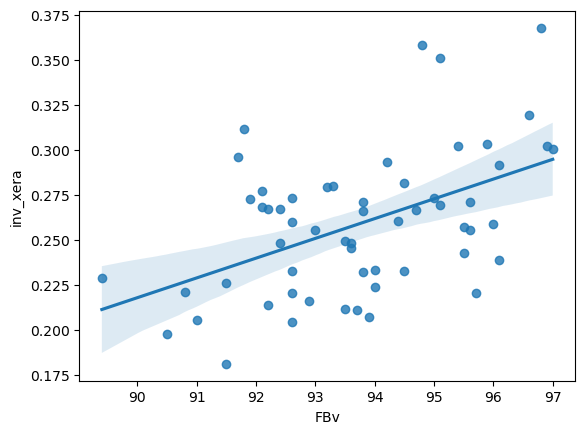

In [51]:
scat6 = sns.regplot(data=inv_xera_df, x='FBv', y='inv_xera')

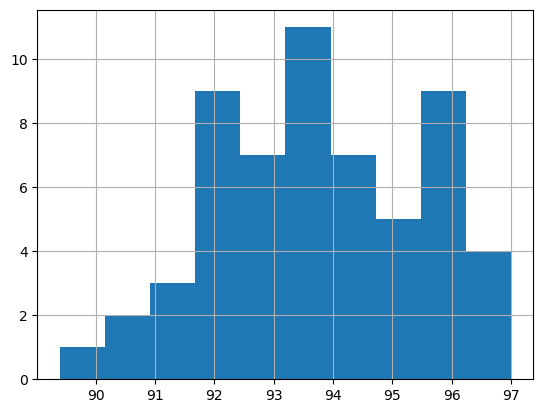

In [52]:
hist6 = inv_xera_df['FBv'].hist()

In [53]:
# outliers
z_scores6 = np.abs(stats.zscore(inv_xera_df))
z_score_df6 = pd.DataFrame(z_scores6, columns=inv_xera_df.columns)
outliers6 = np.where((z_scores6 > 3).any(axis=1))[0]
print('Outliers:', outliers6)
print('Number of outliers:', len(outliers6))

Outliers: []
Number of outliers: 0


In [54]:
influence6 = results6.get_influence()
(c6, p6) = influence6.cooks_distance
high_influence6_df = pd.DataFrame()
high_influence6_df['cooks_d'] = c6
high_influence6_df['leverage'] = influence6.hat_matrix_diag
n6 = len(high_influence6_df)
threshold6 = 1 / n6
high_influence6_df['high_influence'] = high_influence6_df['cooks_d'] > threshold6
high_influence_indices6 = np.where(high_influence6_df['high_influence'])[0]
print(inv_xera_df.loc[high_influence_indices6])
print()
print(high_influence6_df.head())

     FBv  xERA  inv_xera
0   94.8  2.79  0.358423
1   96.8  2.72  0.367647
2   95.1  2.85  0.350877
9   92.2  3.74  0.267380
23  95.9  3.30  0.303030
24  96.1  3.43  0.291545
27  93.7  4.74  0.210970
28  95.6  3.91  0.255754
29  94.4  3.84  0.260417
31  90.8  4.52  0.221239
43  92.6  4.53  0.220751
47  92.6  4.89  0.204499
48  92.6  3.85  0.259740
49  91.5  4.42  0.226244
51  94.5  4.30  0.232558
56  92.9  4.63  0.215983

    cooks_d  leverage  high_influence
0  0.079076  0.023551            True
1  0.189602  0.070029            True
2  0.071923  0.027642            True
3  0.009036  0.032750           False
4  0.008682  0.030693           False


In [55]:
inv_xera_df66 = inv_xera_df
inv_xera_df66 = inv_xera_df.drop(high_influence_indices6)
print(inv_xera_df66.shape)
inv_xera_df66.head()

(42, 3)


,FBv,xERA,inv_xera
11,95.4,3.31,0.302115
20,96.9,3.31,0.302115
17,94.5,3.55,0.281690
22,92.6,4.30,0.232558
13,96.6,3.13,0.319489


In [56]:
# Model 6 without outliers
x66 = MS(inv_xera_df66[['FBv']]).fit_transform(inv_xera_df66)
y66 = inv_xera_df66[['inv_xera']]
model66 = sm.OLS(y66, x66)
results66 = model66.fit()
results66.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     6.955
Date:                Wed, 08 Oct 2025   Prob (F-statistic):             0.0118
Time:                        20:13:41   Log-Likelihood:                 88.088
No. Observations:                  42   AIC:                            -172.2
Df Residuals:                      40   BIC:                            -168.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4051      0.251     -1.614      0.114      -0.912       0.102
FBv            0.0071      0.003      2.637      0.012       0.002       0.012
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.719
Skew:                          -0.032   Prob(JB):                        0.698
Kurtosis:                       2.362   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 7 adding Location to the fastball regression model

In [57]:
location_fb_df = pitchers_data[['FBv', 'Location+', 'xERA']]
x7 = MS(location_fb_df[['FBv','Location+']]).fit_transform(location_fb_df)
y7 = location_fb_df[['xERA']]
model7 = sm.OLS(y7, x7)
results7 = model7.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           8.81e-05
Time:                        20:13:41   Log-Likelihood:                -41.097
No. Observations:                  58   AIC:                             88.19
Df Residuals:                      55   BIC:                             94.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.8253      3.796      5.750      0.000      14.218      29.433
FBv           -0.1592      0.038     -4.184      0.000      -0.235      -0.083
Location+     -0.0287      0.016     -1.849      0.070      -0.060       0.002
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.841
Skew:                           0.200   Prob(JB):                        0.657
Kurtosis:                       2.566   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 0.98, 'Model 7 Scatterplot Matrix Fastball & Location')

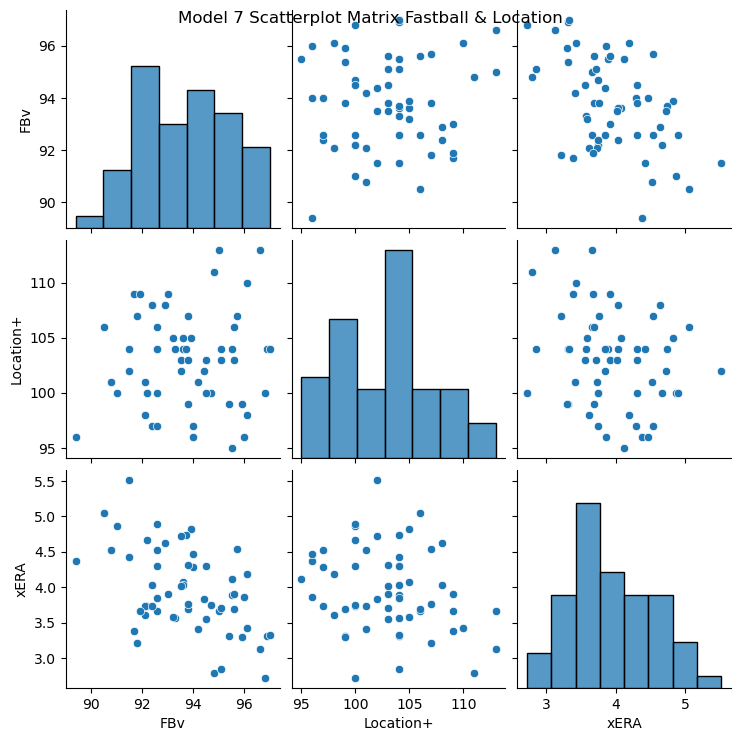

In [58]:
location_fb_df = location_fb_df.copy()
scat7 = sns.pairplot(location_fb_df)
scat7.fig.suptitle("Model 7 Scatterplot Matrix Fastball & Location")

In [59]:
# outliers
z_scores7 = np.abs(stats.zscore(location_fb_df))
z_score_df7 = pd.DataFrame(z_scores7, columns=location_fb_df.columns)
outliers7 = np.where((z_scores7 > 3).any(axis=1))[0]
print('Outliers:', outliers7)
print('Number of outliers:', len(outliers7))

Outliers: []
Number of outliers: 0


In [60]:
# high influence
influence7 = results7.get_influence()
(c7, p7) = influence7.cooks_distance
high_influence7_df = pd.DataFrame()
high_influence7_df['cooks_d'] = c7
high_influence7_df['leverage'] = influence7.hat_matrix_diag
n7 = len(high_influence7_df)
threshold7 = 2 / n7
high_influence7_df['high_influence'] = high_influence7_df['cooks_d'] > threshold7
high_influence_indices7 = np.where(high_influence7_df['high_influence'])[0]
print(location_fb_df.loc[high_influence_indices7])
print()
print(high_influence7_df.head())

     FBv  Location+  xERA
0   94.8        111  2.79
1   96.8        100  2.72
24  96.1        110  3.43
27  93.7        104  4.74
29  94.4        102  3.84
43  92.6         97  4.53
47  92.6        100  4.89
49  91.5        104  4.42
51  94.5        100  4.30

    cooks_d  leverage  high_influence
0  0.072355  0.080899            True
1  0.087440  0.082224            True
2  0.028378  0.028145           False
3  0.017508  0.050472           False
4  0.015521  0.037736           False


In [61]:
location_fb_df77 = location_fb_df
location_fb_df77 = location_fb_df77.drop(high_influence_indices7)
print(location_fb_df77.shape)
location_fb_df77.head()

(49, 3)


,FBv,Location+,xERA
2,95.1,104,2.85
11,95.4,99,3.31
9,92.2,100,3.74
20,96.9,104,3.31
17,94.5,103,3.55


In [62]:
x77 = MS(location_fb_df77[['FBv','Location+']]).fit_transform(location_fb_df77)
y77 = location_fb_df77[['xERA']]
model77 = sm.OLS(y77, x77)
results77 = model77.fit()
results77.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xERA   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     6.382
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00358
Time:                        20:13:42   Log-Likelihood:                -33.429
No. Observations:                  49   AIC:                             72.86
Df Residuals:                      46   BIC:                             78.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.4925      4.074      4.539      0.000      10.291      26.694
FBv           -0.1317      0.040     -3.286      0.002      -0.212      -0.051
Location+     -0.0215      0.017     -1.291      0.203      -0.055       0.012
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.653
Skew:                           0.444   Prob(JB):                        0.438
Kurtosis:                       2.859   Cond. No.                     8.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 8 Inverse on the response variable

In [63]:
inv_xera_fb_loc_df = location_fb_df
inv_xera_fb_loc_df['inv_xera'] = 1 / inv_xera_fb_loc_df['xERA']
x8 = MS(inv_xera_fb_loc_df[['FBv', 'Location+']]).fit_transform(inv_xera_fb_loc_df)
y8 = inv_xera_fb_loc_df[['inv_xera']]
model8 = sm.OLS(y8, x8)
results8 = model8.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.32
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           7.64e-05
Time:                        20:13:42   Log-Likelihood:                 115.68
No. Observations:                  58   AIC:                            -225.4
Df Residuals:                      55   BIC:                            -219.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9472      0.254     -3.724      0.000      -1.457      -0.438
FBv            0.0106      0.003      4.150      0.000       0.005       0.016
Location+      0.0021      0.001      2.002      0.050   -2.13e-06       0.004
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.958
Skew:                           0.449   Prob(JB):                        0.376
Kurtosis:                       2.935   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.02, 'Model 8 Scatterplot Matrix')

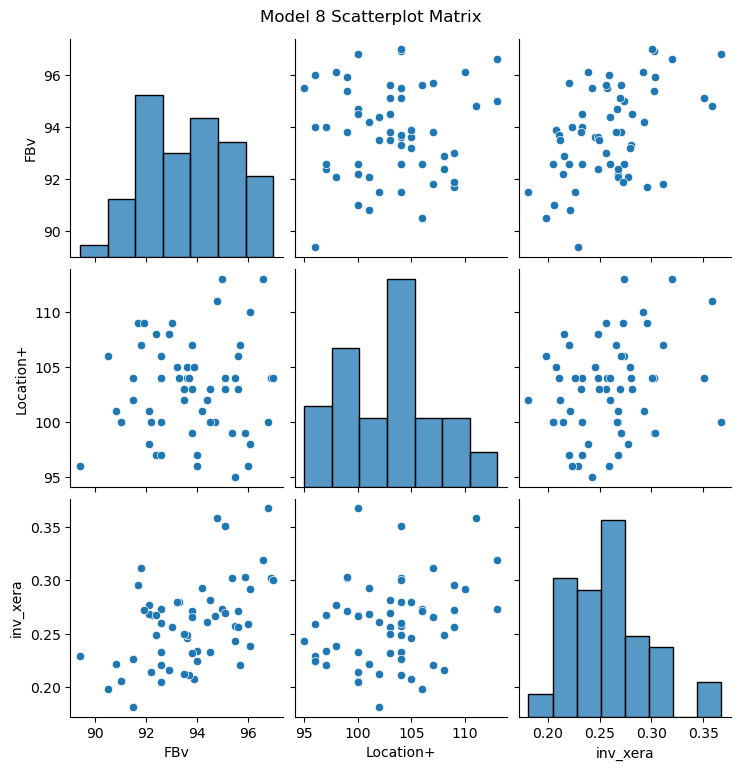

In [64]:
inv_xera_fb_loc_df = inv_xera_fb_loc_df.drop('xERA', axis=1)
inv_xera_fb_loc_df = inv_xera_fb_loc_df.copy()
scat8 = sns.pairplot(inv_xera_fb_loc_df)
scat8.fig.suptitle("Model 8 Scatterplot Matrix", y=1.02)

In [65]:
# outliers
z_scores8 = np.abs(stats.zscore(inv_xera_fb_loc_df))
z_score_df8 = pd.DataFrame(z_scores8, columns=inv_xera_fb_loc_df.columns)
outliers8 = np.where((z_scores8 > 3).any(axis=1))[0]
print('Outliers:', outliers8)
print('Number of outliers:', len(outliers8))

Outliers: []
Number of outliers: 0


In [66]:
influence8 = results8.get_influence()
(c8, p8) = influence8.cooks_distance
high_influence8_df = pd.DataFrame()
high_influence8_df['cooks_d'] = c8
high_influence8_df['leverage'] = influence8.hat_matrix_diag
n8 = len(high_influence8_df)
threshold8 = 2 / n8
high_influence8_df['high_influence'] = high_influence8_df['cooks_d'] > threshold8
high_influence_indices8 = np.where(high_influence8_df['high_influence'])[0]
print(inv_xera_fb_loc_df.loc[high_influence_indices8])
print()
print(high_influence8_df.head())

     FBv  Location+  inv_xera
0   94.8        111  0.358423
1   96.8        100  0.367647
2   95.1        104  0.350877
24  96.1        110  0.291545
27  93.7        104  0.210970
29  94.4        102  0.260417
43  92.6         97  0.220751
47  92.6        100  0.204499
49  91.5        104  0.226244

    cooks_d  leverage  high_influence
0  0.143197  0.080899            True
1  0.194117  0.082224            True
2  0.049486  0.028145            True
3  0.018813  0.050472           False
4  0.011408  0.037736           False


In [67]:
inv_xera_fb_loc_df88 = inv_xera_fb_loc_df
inv_xera_fb_loc_df88 = inv_xera_fb_loc_df88.drop(high_influence_indices8)
print(inv_xera_fb_loc_df88.shape)
inv_xera_fb_loc_df88.head()

(49, 3)


,FBv,Location+,inv_xera
11,95.4,99,0.302115
9,92.2,100,0.267380
20,96.9,104,0.302115
17,94.5,103,0.281690
22,92.6,104,0.232558


In [68]:
x88 = MS(inv_xera_fb_loc_df88[['FBv', 'Location+']]).fit_transform(inv_xera_fb_loc_df88)
y88 = inv_xera_fb_loc_df88[['inv_xera']]
model88 = sm.OLS(y88, x88)
results88 = model88.fit()
results88.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               inv_xera   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     6.090
Date:                Wed, 08 Oct 2025   Prob (F-statistic):            0.00450
Time:                        20:13:42   Log-Likelihood:                 105.35
No. Observations:                  49   AIC:                            -204.7
Df Residuals:                      46   BIC:                            -199.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5849      0.242     -2.422      0.019      -1.071      -0.099
FBv            0.0073      0.002      3.064      0.004       0.002       0.012
Location+      0.0016      0.001      1.600      0.116      -0.000       0.004
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.896
Skew:                          -0.103   Prob(JB):                        0.639
Kurtosis:                       2.370   Cond. No.                     8.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""